In [1]:
import cv2

from robust_line_based_estimator.line_matching.line_matcher import LineMatcher
from robust_line_based_estimator.visualization import plot_images, plot_lines, plot_color_line_matches

In [2]:
img0_file = 'img/terrace0.JPG'
img0 = cv2.imread(img0_file, 0)
img1_file = 'img/terrace1.JPG'
img1 = cv2.imread(img1_file, 0)

# LSD+LBD matcher
lsd_lbd_matcher = LineMatcher(line_detector='lsd', line_matcher='lbd')

# SOLD2 matcher
conf = {
    'sold2': {
        'ckpt_path': '../third_party/SOLD2/pretrained_models/sold2_wireframe.tar',
        'device': 'cuda'
    }
}
sold2_matcher = LineMatcher(line_detector='sold2', line_matcher='sold2', conf=conf)

# LSD + SuperGlue endpoints matcher
lsd_sg_endpoints_matcher = LineMatcher(line_detector='lsd', line_matcher='superglue_endpoints', conf=conf)

Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


## Line detection and description

/home/remi/env_daniel/lib/python3.6/site-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


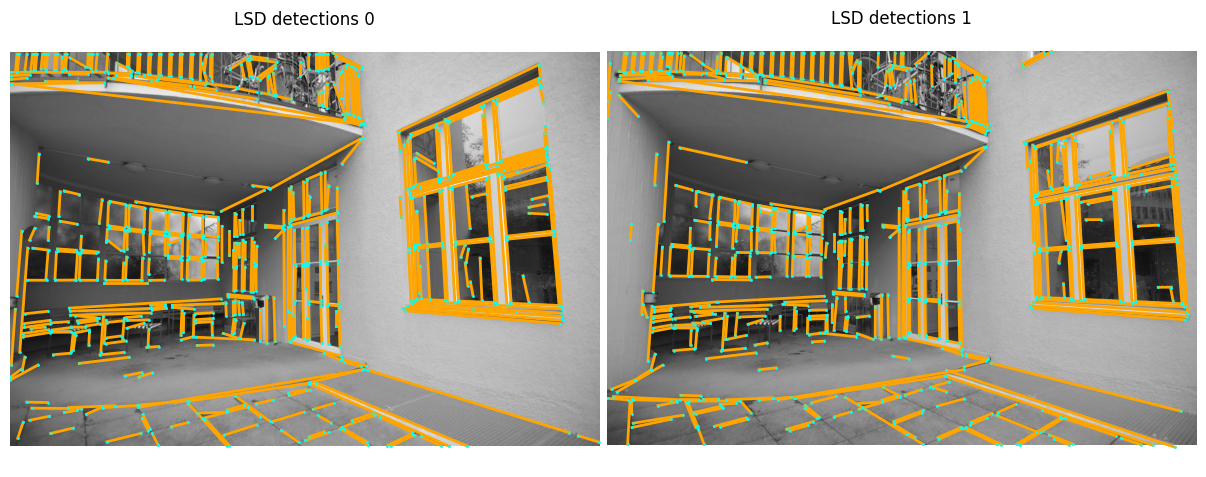

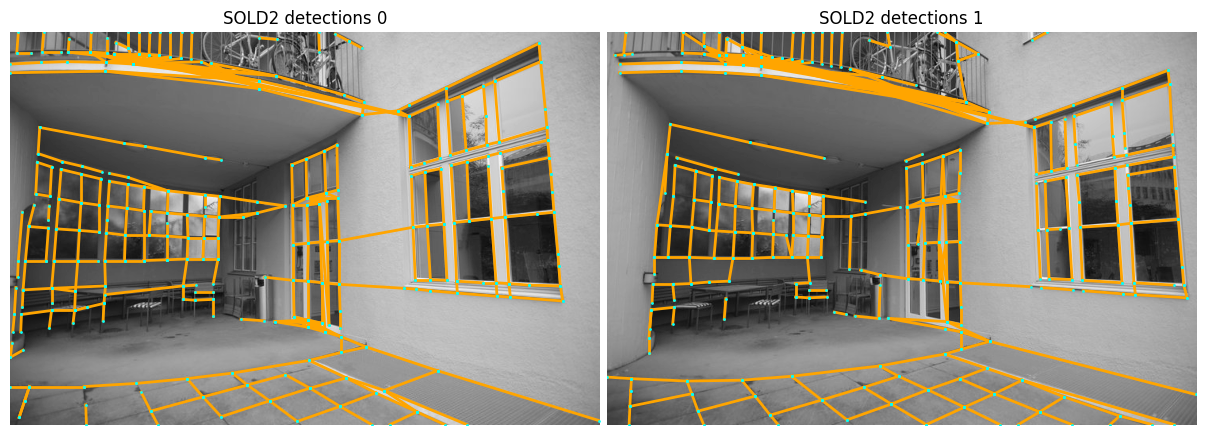

In [3]:
## LSD detections
lsd_lbd_features0 = lsd_lbd_matcher.detect_and_describe_lines(img0)
lsd_lbd_features1 = lsd_lbd_matcher.detect_and_describe_lines(img1)

## SOLD2 detections
sold2_features0 = sold2_matcher.detect_and_describe_lines(img0)
sold2_features1 = sold2_matcher.detect_and_describe_lines(img1)

## LSD+SGEndpoints detections
lsd_sg_features0 = lsd_sg_endpoints_matcher.detect_and_describe_lines(img0)
lsd_sg_features1 = lsd_sg_endpoints_matcher.detect_and_describe_lines(img1)

# Display the detections
plot_images([img0, img1], ['LSD detections 0', 'LSD detections 1'])
plot_lines([lsd_lbd_features0["line_segments"][:, :, [1, 0]], lsd_lbd_features1["line_segments"][:, :, [1, 0]]])
plot_images([img0, img1], ['SOLD2 detections 0', 'SOLD2 detections 1'])
plot_lines([sold2_features0["line_segments"][:, :, [1, 0]], sold2_features1["line_segments"][:, :, [1, 0]]])

## Line matching

/home/remi/Programmes/robust-line-based-estimator/robust_line_based_estimator/line_matching/superglue_endpoints.py:549: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dtype=torch.float, device=self.device),
/home/remi/Programmes/robust-line-based-estimator/robust_line_based_estimator/line_matching/superglue_endpoints.py:552: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dtype=torch.float, device=self.device),


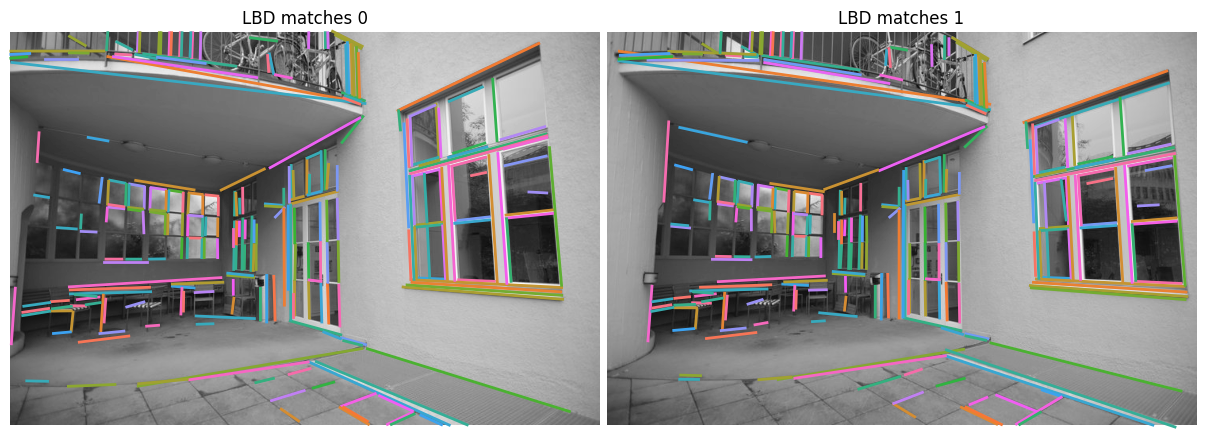

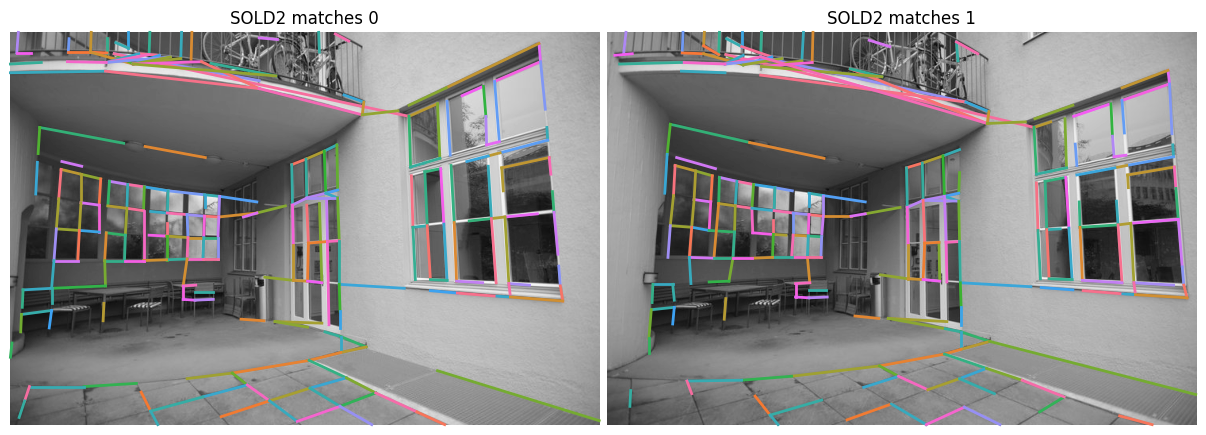

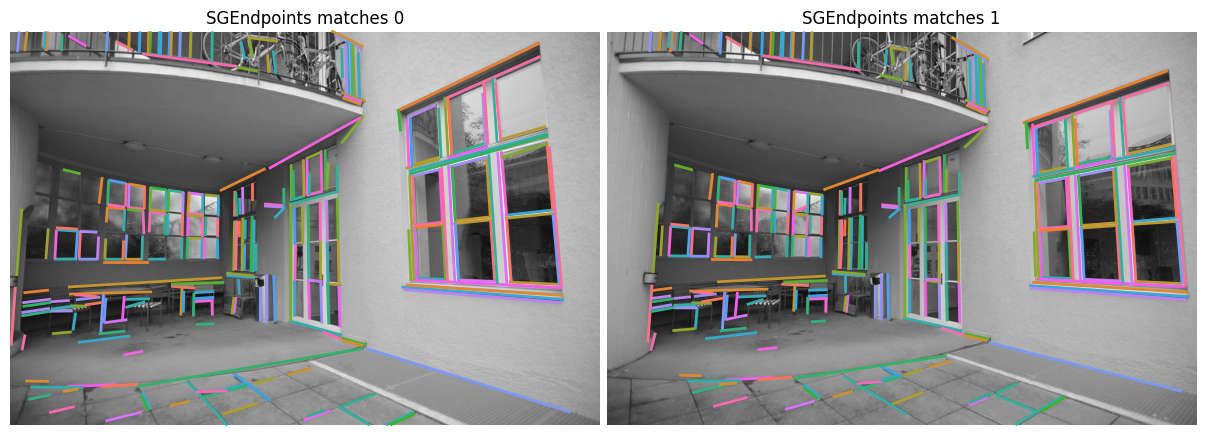

In [4]:
## LBD matching
_, m_lines0_lbd, m_lines1_lbd = lsd_lbd_matcher.match_lines(img0, img1, lsd_lbd_features0, lsd_lbd_features1)

## SOLD2 matching
_, m_lines0_sold2, m_lines1_sold2 = sold2_matcher.match_lines(img0, img1, sold2_features0, sold2_features1)

## SuperGlueEndpoints matching
_, m_lines0_sg, m_lines1_sg = lsd_sg_endpoints_matcher.match_lines(img0, img1, lsd_sg_features0, lsd_sg_features1)

# Plot the matches
plot_images([img0, img1], ['LBD matches 0', 'LBD matches 1'])
plot_color_line_matches([m_lines0_lbd[:, :, [1, 0]], m_lines1_lbd[:, :, [1, 0]]])
plot_images([img0, img1], ['SOLD2 matches 0', 'SOLD2 matches 1'])
plot_color_line_matches([m_lines0_sold2[:, :, [1, 0]], m_lines1_sold2[:, :, [1, 0]]])
plot_images([img0, img1], ['SGEndpoints matches 0', 'SGEndpoints matches 1'])
plot_color_line_matches([m_lines0_sg[:, :, [1, 0]], m_lines1_sg[:, :, [1, 0]]])